In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    Input
)
import cv2
import requests
from io import BytesIO
from PIL import Image

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
labels = [
    "airplane", "automobile", "bird", "cat",
    "deer", "dog", "frog", "horse", "ship", "truck"
]

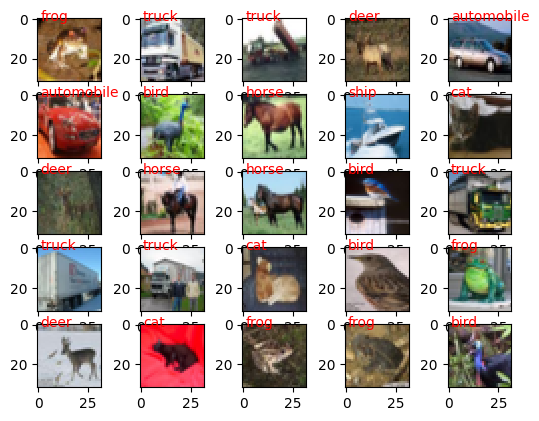

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.text(1, 1, labels[y_train[i][0]], fontsize=10, color='red')
plt.show()

In [6]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 187,418 (732.10 KB)

 Trainable params: 187,418 (732.10 KB)

 Non-trainable params: 0 (0.00 B)

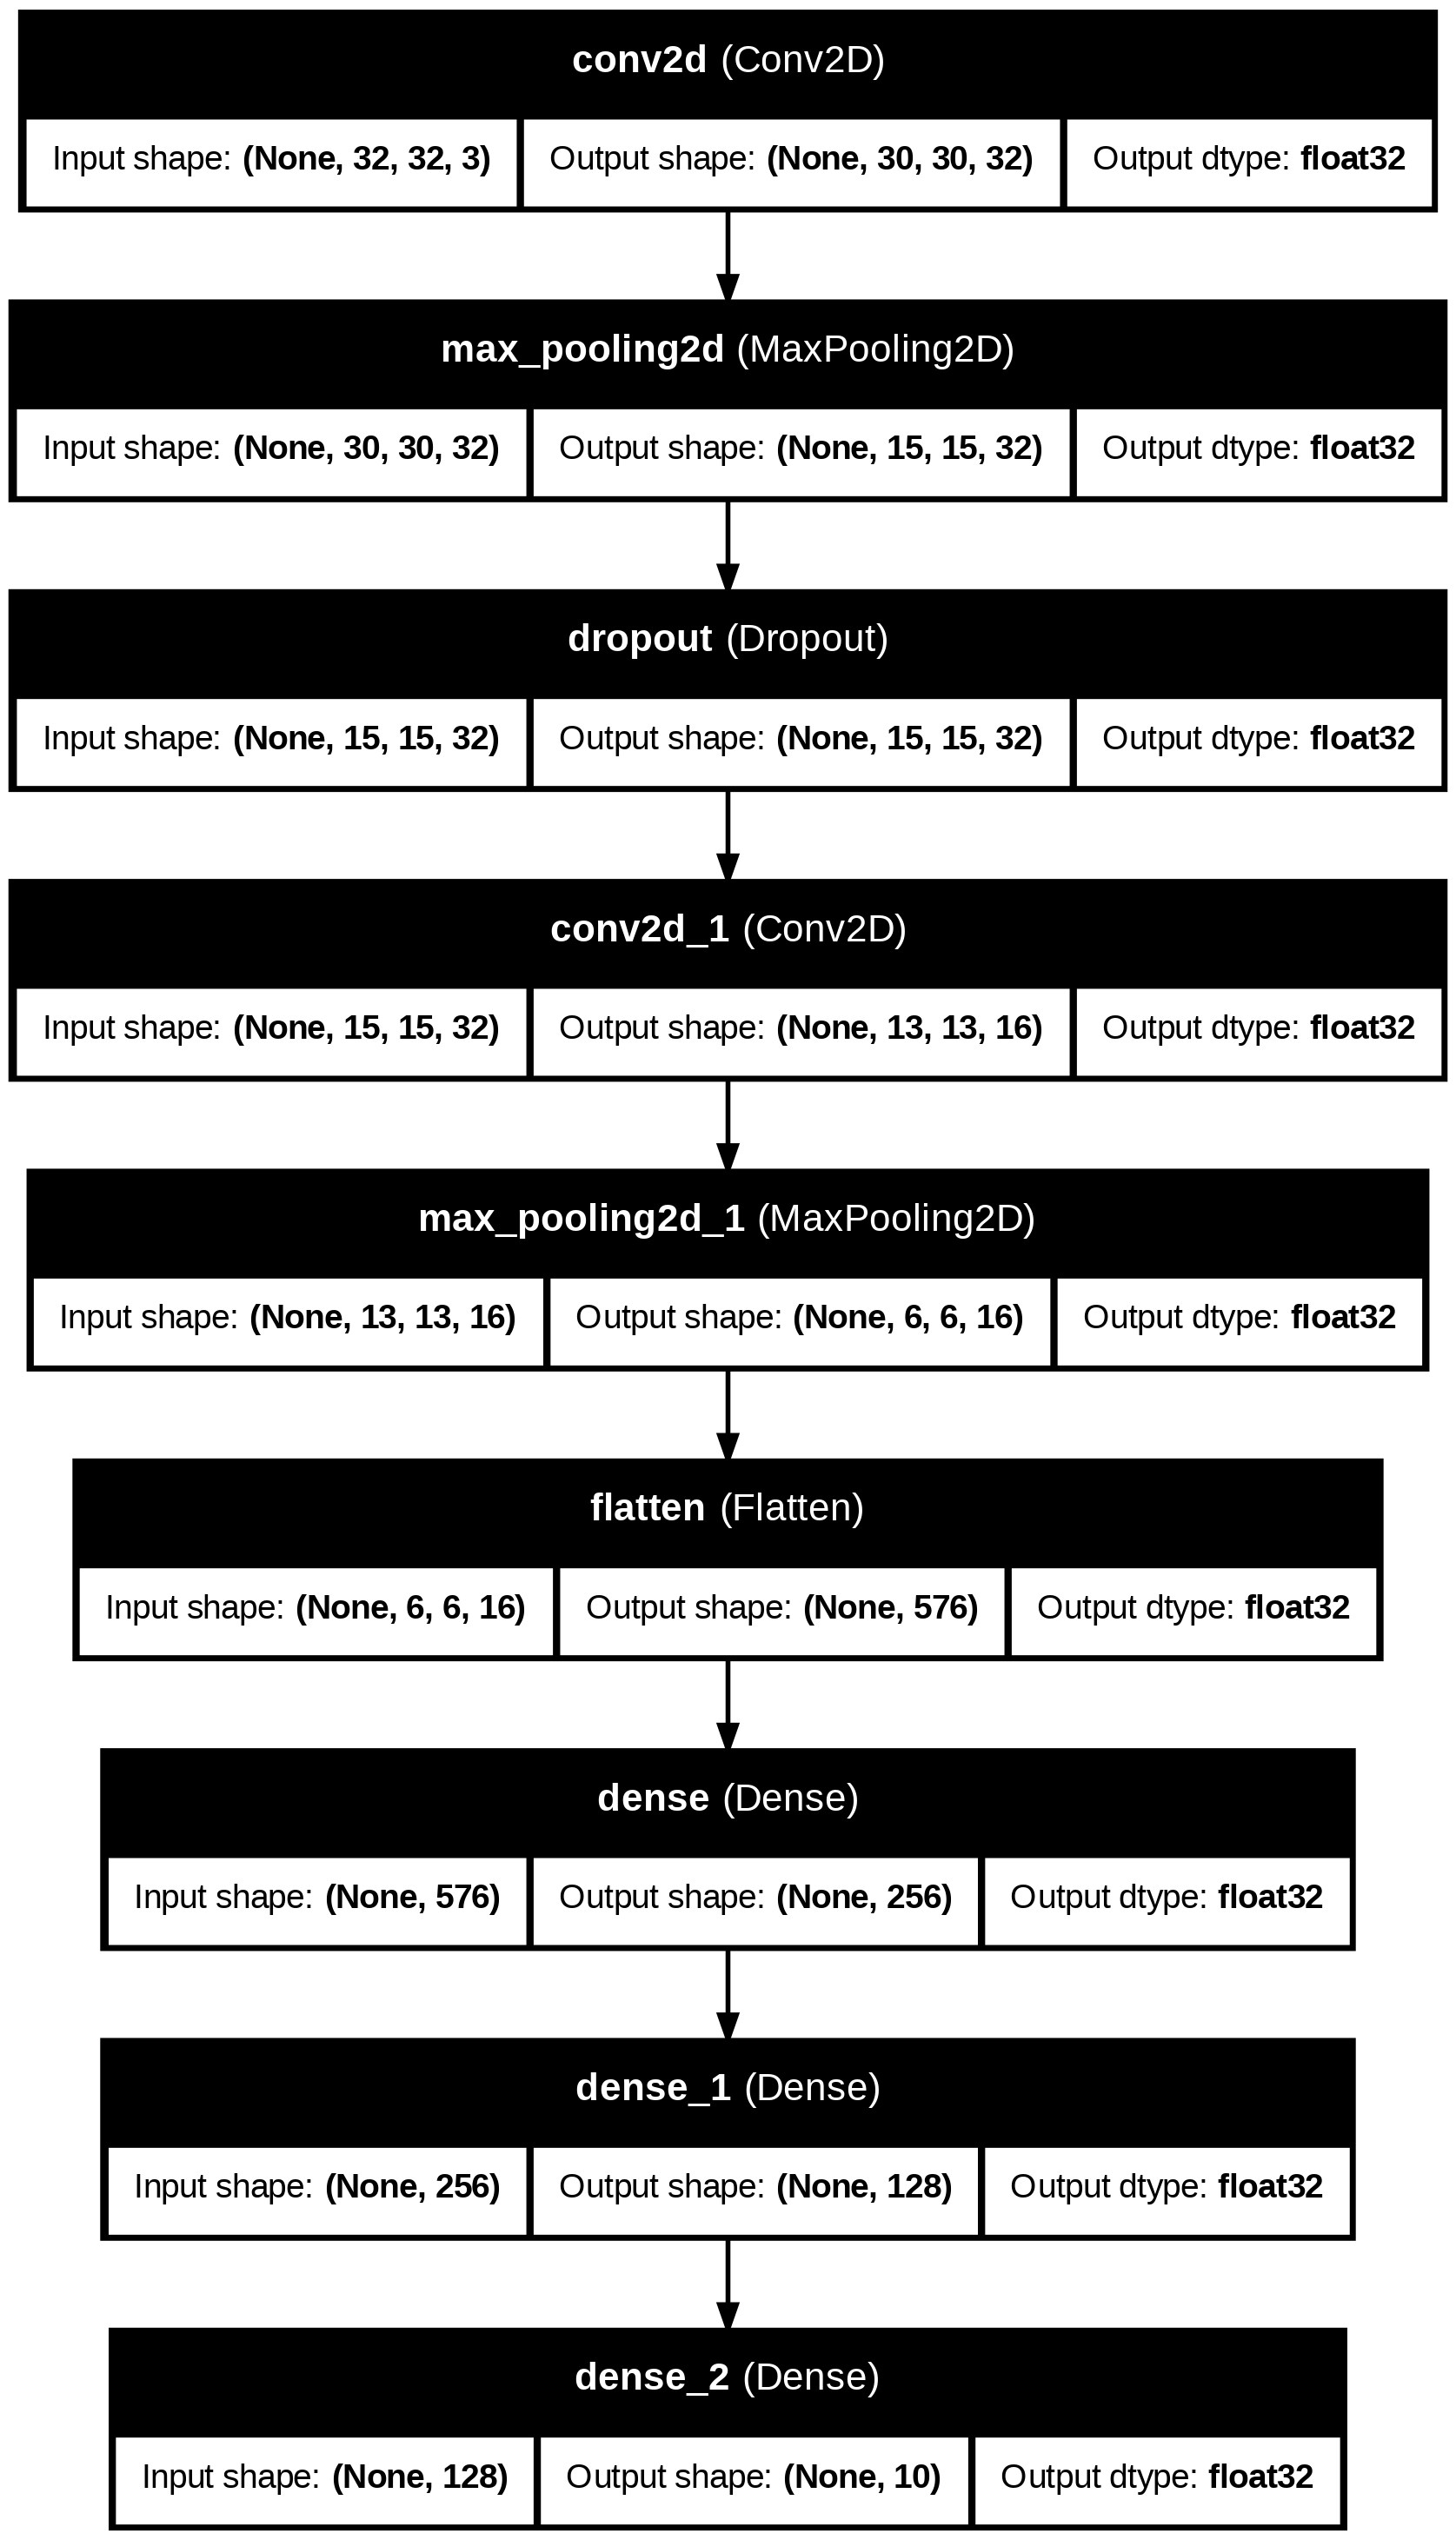

In [8]:
from tensorflow.keras.utils import  plot_model
plot_model(
    model=model,
    show_dtype=True,
    show_layer_names=True,
    show_shapes=True
)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model.fit(
    X_train, y_train,
    batch_size=10,
    epochs=10,
)

Epoch 1/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.1812 - loss: 2.8637
Epoch 2/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.4213 - loss: 1.5961
Epoch 3/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.5038 - loss: 1.3988
Epoch 4/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.5550 - loss: 1.2762
Epoch 5/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.5860 - loss: 1.1920
Epoch 6/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6147 - loss: 1.1223
Epoch 7/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6361 - loss: 1.0647
Epoch 8/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6530 - loss: 1.0184
Epoch 9/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6681 - loss: 0.9723
Epoch 10/10
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6819 - loss: 0.9356


In [11]:
model.evaluate(X_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5983 - loss: 1.2480


[1.2525064945220947, 0.5943999886512756]

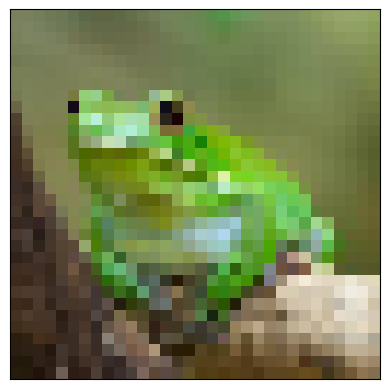

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'frog'

In [40]:
img = cv2.imread('/content/frog.jpeg')
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
resized_image = cv2.resize(img, (32, 32))
plt.xticks([])
plt.yticks([])
plt.imshow(resized_image)
plt.show()

prediction = model.predict(resized_image.reshape(1, 32, 32, 3))
labels[np.argmax(prediction)]